<a href="https://colab.research.google.com/github/hasdasda/HoctheoPhamDinhKhanh/blob/main/BaitapcoHuongipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tất cả

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive
%cd VNPT
%cd VNPT_01

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/.shortcut-targets-by-id/1UnC-iLs86hXm-MhLt4GMg_ua_MKNBL4I/VNPT/VNPT_01
[Errno 2] No such file or directory: 'VNPT'
/content/drive/.shortcut-targets-by-id/1UnC-iLs86hXm-MhLt4GMg_ua_MKNBL4I/VNPT/VNPT_01
[Errno 2] No such file or directory: 'VNPT_01'
/content/drive/.shortcut-targets-by-id/1UnC-iLs86hXm-MhLt4GMg_ua_MKNBL4I/VNPT/VNPT_01


In [ ]:
#Bước 1: Import thư viện
import pandas as pd
import numpy as np
from math import floor
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Các thư viện cần thiết để train model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Conv1D

import sys
from os import mkdir
from os.path import exists as path_exists
from os.path import join
import time

import keras
from keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

from tqdm import tqdm


In [ ]:
# Hiển thị tất cả các cột
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# Danh sách tên cột
column_names = [
   "pkSeqID", "stime", "flgs", "proto", "saddr", "sport", "daddr", "dport",
    "pkts", "bytes", "state", "ltime", "seq", "dur", "mean", "stddev",
    "smac", "dmac", "sum", "min", "max", "soui", "doui", "sco", "dco",
    "spkts", "dpkts", "sbytes", "dbytes", "rate", "srate", "drate",
    "attack", "category", "subcategory"
]

# Đọc file CSV và thêm header
data = pd.read_csv('UNSW_2018_IoT_Botnet_Dataset_1.csv', header=None, names=column_names)


<ipython-input-82-2726698041f1>:15: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('UNSW_2018_IoT_Botnet_Dataset_1.csv', header=None, names=column_names)


In [ ]:
data

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,state,ltime,seq,dur,mean,stddev,smac,dmac,sum,min,max,soui,doui,sco,dco,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,1,1.526344e+09,e,arp,192.168.100.1,NaN,192.168.100.3,NaN,4,240,CON,1.526345e+09,9,1195.996582,0.000006,0.000002,NaN,NaN,0.000011,0.000004,0.000007,NaN,NaN,NaN,NaN,2,2,120,120,0.002508,0.000836,0.000836,0,Normal,Normal
1,2,1.526344e+09,e,tcp,192.168.100.7,139,192.168.100.4,36390,10,680,CON,1.526346e+09,10,1453.945923,0.000028,0.000008,NaN,NaN,0.000138,0.000022,0.000042,NaN,NaN,NaN,NaN,5,5,350,330,0.006190,0.002751,0.002751,0,Normal,Normal
2,3,1.526344e+09,e,udp,192.168.100.149,51838,27.124.125.250,123,2,180,CON,1.526344e+09,11,0.048565,0.048565,0.000000,NaN,NaN,0.048565,0.048565,0.048565,NaN,NaN,NaN,NaN,1,1,90,90,20.590960,0.000000,0.000000,0,Normal,Normal
3,4,1.526344e+09,e,arp,192.168.100.4,NaN,192.168.100.7,NaN,10,510,CON,1.526346e+09,12,1454.080322,0.000238,0.000022,NaN,NaN,0.001189,0.000199,0.000261,NaN,NaN,NaN,NaN,5,5,210,300,0.006189,0.002751,0.002751,0,Normal,Normal
4,5,1.526344e+09,e,udp,192.168.100.27,58999,192.168.100.1,53,4,630,CON,1.526345e+09,14,569.933960,0.098505,0.080150,NaN,NaN,0.197011,0.018356,0.178655,NaN,NaN,NaN,NaN,2,2,174,456,0.005264,0.001755,0.001755,0,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,1.526949e+09,e,tcp,192.168.100.150,49731,192.168.100.3,12020,2,120,RST,1.526949e+09,180403,0.041920,0.041920,0.000000,NaN,NaN,0.041920,0.041920,0.041920,NaN,NaN,NaN,NaN,1,1,60,60,23.854963,0.000000,0.000000,1,Reconnaissance,Service_Scan
999996,999997,1.526949e+09,e,tcp,192.168.100.150,49731,192.168.100.3,60532,2,120,RST,1.526949e+09,180404,0.041920,0.041920,0.000000,NaN,NaN,0.041920,0.041920,0.041920,NaN,NaN,NaN,NaN,1,1,60,60,23.854963,0.000000,0.000000,1,Reconnaissance,Service_Scan
999997,999998,1.526949e+09,e,tcp,192.168.100.150,49731,192.168.100.3,52144,2,120,RST,1.526949e+09,180405,0.041907,0.041907,0.000000,NaN,NaN,0.041907,0.041907,0.041907,NaN,NaN,NaN,NaN,1,1,60,60,23.862362,0.000000,0.000000,1,Reconnaissance,Service_Scan
999998,999999,1.526949e+09,e,tcp,192.168.100.150,49731,192.168.100.3,58105,2,120,RST,1.526949e+09,180406,0.041920,0.041920,0.000000,NaN,NaN,0.041920,0.041920,0.041920,NaN,NaN,NaN,NaN,1,1,60,60,23.854963,0.000000,0.000000,1,Reconnaissance,Service_Scan


In [ ]:
# Thay thế các giá trị infinity bằng các giá trị nan
# data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Loại bỏ các giá trị nan
# data = data.dropna()
data= data.dropna(axis=1, how='all')
data = data.dropna()

In [ ]:
data


,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,state,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
1,2,1.526344e+09,e,tcp,192.168.100.7,139,192.168.100.4,36390,10,680,CON,1.526346e+09,10,1453.945923,0.000028,0.000008,0.000138,0.000022,0.000042,5,5,350,330,0.006190,0.002751,0.002751,0,Normal,Normal
2,3,1.526344e+09,e,udp,192.168.100.149,51838,27.124.125.250,123,2,180,CON,1.526344e+09,11,0.048565,0.048565,0.000000,0.048565,0.048565,0.048565,1,1,90,90,20.590960,0.000000,0.000000,0,Normal,Normal
4,5,1.526344e+09,e,udp,192.168.100.27,58999,192.168.100.1,53,4,630,CON,1.526345e+09,14,569.933960,0.098505,0.080150,0.197011,0.018356,0.178655,2,2,174,456,0.005264,0.001755,0.001755,0,Normal,Normal
7,8,1.526344e+09,e,udp,192.168.100.150,58360,192.168.217.2,53,2,172,INT,1.526344e+09,18,2.500101,0.000000,0.000000,0.000000,0.000000,0.000000,2,0,172,0,0.399984,0.399984,0.000000,0,Normal,Normal
8,9,1.526344e+09,e,udp,192.168.100.149,37214,192.168.217.2,53,2,172,INT,1.526344e+09,41,2.501101,0.000000,0.000000,0.000000,0.000000,0.000000,2,0,172,0,0.399824,0.399824,0.000000,0,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,1.526949e+09,e,tcp,192.168.100.150,49731,192.168.100.3,12020,2,120,RST,1.526949e+09,180403,0.041920,0.041920,0.000000,0.041920,0.041920,0.041920,1,1,60,60,23.854963,0.000000,0.000000,1,Reconnaissance,Service_Scan
999996,999997,1.526949e+09,e,tcp,192.168.100.150,49731,192.168.100.3,60532,2,120,RST,1.526949e+09,180404,0.041920,0.041920,0.000000,0.041920,0.041920,0.041920,1,1,60,60,23.854963,0.000000,0.000000,1,Reconnaissance,Service_Scan
999997,999998,1.526949e+09,e,tcp,192.168.100.150,49731,192.168.100.3,52144,2,120,RST,1.526949e+09,180405,0.041907,0.041907,0.000000,0.041907,0.041907,0.041907,1,1,60,60,23.862362,0.000000,0.000000,1,Reconnaissance,Service_Scan
999998,999999,1.526949e+09,e,tcp,192.168.100.150,49731,192.168.100.3,58105,2,120,RST,1.526949e+09,180406,0.041920,0.041920,0.000000,0.041920,0.041920,0.041920,1,1,60,60,23.854963,0.000000,0.000000,1,Reconnaissance,Service_Scan


In [ ]:
data.dtypes

,0
pkSeqID,int64
stime,float64
flgs,object
proto,object
saddr,object
sport,object
daddr,object
dport,object
pkts,int64
bytes,int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999513 entries, 1 to 999999
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   pkSeqID      999513 non-null  int64  
 1   stime        999513 non-null  float64
 2   flgs         999513 non-null  object 
 3   proto        999513 non-null  object 
 4   saddr        999513 non-null  object 
 5   sport        999513 non-null  object 
 6   daddr        999513 non-null  object 
 7   dport        999513 non-null  object 
 8   pkts         999513 non-null  int64  
 9   bytes        999513 non-null  int64  
 10  state        999513 non-null  object 
 11  ltime        999513 non-null  float64
 12  seq          999513 non-null  int64  
 13  dur          999513 non-null  float64
 14  mean         999513 non-null  float64
 15  stddev       999513 non-null  float64
 16  sum          999513 non-null  float64
 17  min          999513 non-null  float64
 18  max          999513 non-null 

In [ ]:
data['subcategory'].value_counts()

,count
subcategory,
Service_Scan,997753
Normal,1760


In [ ]:
data['attack'].value_counts()

In [ ]:
data['category'].value_counts()

,count
category,
Reconnaissance,997753
Normal,1760


In [ ]:
#Khởi tạo biến thư viện
encoder = LabelEncoder()
# Cho thuật toán đọc các nhãn các loại tấn công
# Ở đây ta chỉ làm bài toán phân loại 2 lớp: Anomaly và Normal ứng với 0 và 1

encoder.fit(data.iloc[:,-3])
encoder.classes_
#Nếu tại đây ta sử dụng câu lệnh transform thì nhãn DoS sẽ có label 0, MITM label1,
#Mirai-Ackflooding label 2, ... Normal label 6
#Để Normal có nhãn 0 ta sắp xếp lại thứ tự các class
#Normal label 0, DoS label 1, Mirai label 2-5, MITM label 6, Scan label 7-8
# encoder.classes_ = np.array(['Normal', 'DoS-Synflooding', 'Mirai-Ackflooding',
#         'Mirai-HTTP Flooding', 'Mirai-Hostbruteforceg', 'Mirai-UDP Flooding',
#         'MITM ARP Spoofing', 'Scan Hostport', 'Scan Port OS'])
#Label chuyển từ dạng chữ sang dạng số
y = encoder.transform(data.iloc[:,-3])

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
#Loại bỏ ip, timestamp, ID ra khỏi data X
columns_to_drop = ['pkSeqID' , 'stime', 'flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport','state','category','subcategory','attack']
X = data.drop(columns=columns_to_drop)
#X = pd.concat([data.iloc[:,:2], data.iloc[:,6:9], data.iloc[:,7:-3]], axis = 1)

In [ ]:
data

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,state,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
1,2,1.526344e+09,e,tcp,192.168.100.7,139,192.168.100.4,36390,10,680,CON,1.526346e+09,10,1453.945923,0.000028,0.000008,0.000138,0.000022,0.000042,5,5,350,330,0.006190,0.002751,0.002751,0,Normal,Normal
2,3,1.526344e+09,e,udp,192.168.100.149,51838,27.124.125.250,123,2,180,CON,1.526344e+09,11,0.048565,0.048565,0.000000,0.048565,0.048565,0.048565,1,1,90,90,20.590960,0.000000,0.000000,0,Normal,Normal
4,5,1.526344e+09,e,udp,192.168.100.27,58999,192.168.100.1,53,4,630,CON,1.526345e+09,14,569.933960,0.098505,0.080150,0.197011,0.018356,0.178655,2,2,174,456,0.005264,0.001755,0.001755,0,Normal,Normal
7,8,1.526344e+09,e,udp,192.168.100.150,58360,192.168.217.2,53,2,172,INT,1.526344e+09,18,2.500101,0.000000,0.000000,0.000000,0.000000,0.000000,2,0,172,0,0.399984,0.399984,0.000000,0,Normal,Normal
8,9,1.526344e+09,e,udp,192.168.100.149,37214,192.168.217.2,53,2,172,INT,1.526344e+09,41,2.501101,0.000000,0.000000,0.000000,0.000000,0.000000,2,0,172,0,0.399824,0.399824,0.000000,0,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,1.526949e+09,e,tcp,192.168.100.150,49731,192.168.100.3,12020,2,120,RST,1.526949e+09,180403,0.041920,0.041920,0.000000,0.041920,0.041920,0.041920,1,1,60,60,23.854963,0.000000,0.000000,1,Reconnaissance,Service_Scan
999996,999997,1.526949e+09,e,tcp,192.168.100.150,49731,192.168.100.3,60532,2,120,RST,1.526949e+09,180404,0.041920,0.041920,0.000000,0.041920,0.041920,0.041920,1,1,60,60,23.854963,0.000000,0.000000,1,Reconnaissance,Service_Scan
999997,999998,1.526949e+09,e,tcp,192.168.100.150,49731,192.168.100.3,52144,2,120,RST,1.526949e+09,180405,0.041907,0.041907,0.000000,0.041907,0.041907,0.041907,1,1,60,60,23.862362,0.000000,0.000000,1,Reconnaissance,Service_Scan
999998,999999,1.526949e+09,e,tcp,192.168.100.150,49731,192.168.100.3,58105,2,120,RST,1.526949e+09,180406,0.041920,0.041920,0.000000,0.041920,0.041920,0.041920,1,1,60,60,23.854963,0.000000,0.000000,1,Reconnaissance,Service_Scan


In [ ]:
X

,pkts,bytes,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate
1,10,680,1.526346e+09,10,1453.945923,0.000028,0.000008,0.000138,0.000022,0.000042,5,5,350,330,0.006190,0.002751,0.002751
2,2,180,1.526344e+09,11,0.048565,0.048565,0.000000,0.048565,0.048565,0.048565,1,1,90,90,20.590960,0.000000,0.000000
4,4,630,1.526345e+09,14,569.933960,0.098505,0.080150,0.197011,0.018356,0.178655,2,2,174,456,0.005264,0.001755,0.001755
7,2,172,1.526344e+09,18,2.500101,0.000000,0.000000,0.000000,0.000000,0.000000,2,0,172,0,0.399984,0.399984,0.000000
8,2,172,1.526344e+09,41,2.501101,0.000000,0.000000,0.000000,0.000000,0.000000,2,0,172,0,0.399824,0.399824,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2,120,1.526949e+09,180403,0.041920,0.041920,0.000000,0.041920,0.041920,0.041920,1,1,60,60,23.854963,0.000000,0.000000
999996,2,120,1.526949e+09,180404,0.041920,0.041920,0.000000,0.041920,0.041920,0.041920,1,1,60,60,23.854963,0.000000,0.000000
999997,2,120,1.526949e+09,180405,0.041907,0.041907,0.000000,0.041907,0.041907,0.041907,1,1,60,60,23.862362,0.000000,0.000000
999998,2,120,1.526949e+09,180406,0.041920,0.041920,0.000000,0.041920,0.041920,0.041920,1,1,60,60,23.854963,0.000000,0.000000


In [ ]:
# Hiển thị tất cả các cột
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
# Hiển thị DataFrame X
X


,pkts,bytes,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate
1,10,680,1.526346e+09,10,1453.945923,0.000028,0.000008,0.000138,0.000022,0.000042,5,5,350,330,0.006190,0.002751,0.002751
2,2,180,1.526344e+09,11,0.048565,0.048565,0.000000,0.048565,0.048565,0.048565,1,1,90,90,20.590960,0.000000,0.000000
4,4,630,1.526345e+09,14,569.933960,0.098505,0.080150,0.197011,0.018356,0.178655,2,2,174,456,0.005264,0.001755,0.001755
7,2,172,1.526344e+09,18,2.500101,0.000000,0.000000,0.000000,0.000000,0.000000,2,0,172,0,0.399984,0.399984,0.000000
8,2,172,1.526344e+09,41,2.501101,0.000000,0.000000,0.000000,0.000000,0.000000,2,0,172,0,0.399824,0.399824,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2,120,1.526949e+09,180403,0.041920,0.041920,0.000000,0.041920,0.041920,0.041920,1,1,60,60,23.854963,0.000000,0.000000
999996,2,120,1.526949e+09,180404,0.041920,0.041920,0.000000,0.041920,0.041920,0.041920,1,1,60,60,23.854963,0.000000,0.000000
999997,2,120,1.526949e+09,180405,0.041907,0.041907,0.000000,0.041907,0.041907,0.041907,1,1,60,60,23.862362,0.000000,0.000000
999998,2,120,1.526949e+09,180406,0.041920,0.041920,0.000000,0.041920,0.041920,0.041920,1,1,60,60,23.854963,0.000000,0.000000


In [ ]:
# Reset hiển thị hàng về mặc định (10 hàng trên và dưới)
#pd.reset_option('display.max_rows')

In [ ]:
print(X.shape)
print(y.shape)

(999513, 17)
(999513,)


In [ ]:
#Bước 3: Cắt lấy file train và file test
#Trong VD này, ta lấy 1/3 số mẫu của tất cả các label
#Khi cắt cần đảm bảo số mẫu của từng label không quá chênh lệch, quá nhỏ
#Cắt data ra làm 2 phần, train chiếm 70%, test chiếm 30% => Train_size = 1/3*0.7=7/30, test_size = 1/3*0.3=0.1
from sklearn.model_selection import train_test_split
#X_train và X_test là các features, y_train và y_test lần lượt là nhãn bộ train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3,shuffle=True)


In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

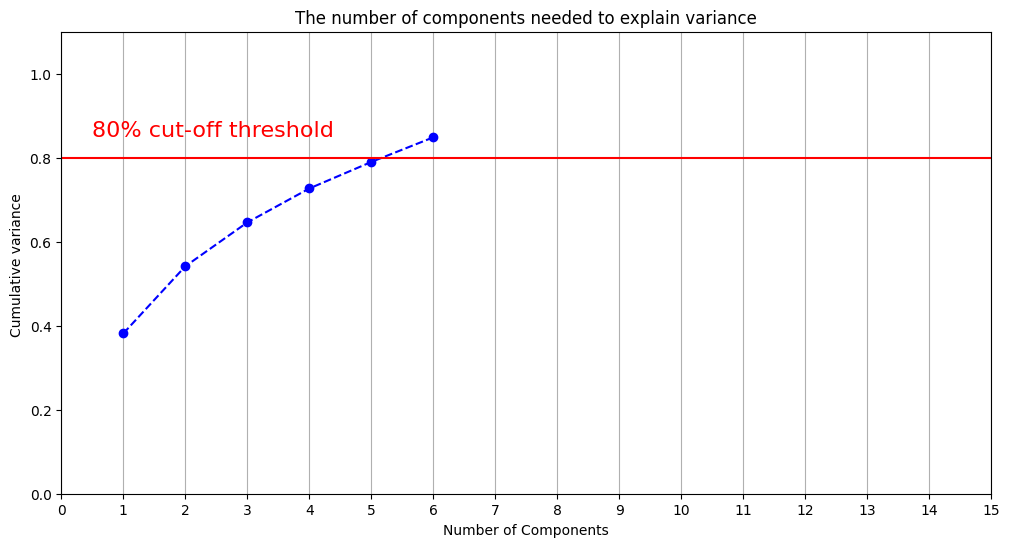

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.8)
pca.fit(X_train_norm)
X_train_norm_reduce = pca.transform(X_train_norm)
X_test_norm_reduce = pca.transform(X_test_norm)

pca.components_


#Vẽ hình
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
# xi = np.arange(1, 8, step=1) # Original line causing the error
# Instead of hardcoding the range, use the actual number of components
xi = np.arange(1, pca.n_components_ + 1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)


plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 16, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance ')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.8, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()



In [ ]:
# The shape of data before using PCA
print(X_train_norm.shape)
# The shape of data after using PCA
print(X_train_norm_reduce.shape)
#print(y)

(699659, 17)
(699659, 6)


In [ ]:
X_test_norm_reduce.shape

(299854, 6)

# Train model

In [ ]:
# Định nghĩa các biến
# Số nốt ở lớp input của mạng NN (khi chưa áp dụng PCA)
input_shp = X_train_norm.shape[1]
# Số nốt ở lớp input của mạng NN (khi áp dụng PCA)
input_shp_pca = X_train_norm_reduce.shape[1]
# Số node ở đầu ra của mạng NN = số lớp cần phân loại
no_label = len(set(y_train))
# Library np.eye returns a 2-D array with ones on the diagonal and zeros elsewhere.
I = np.eye(no_label)
#output_shp = I[y_train,:].shape

In [ ]:
I

array([[1., 0.],
       [0., 1.]])

## Simple ANN


In [ ]:
# Viết hàm cho neural network với các feed forward-layers đơn giản
def simpleANN(input_shape):
  x = Sequential()
  x.add(Dense(1, kernel_initializer='random_normal', input_dim=input_shape)) # Hidden layer với 1 nodes linear
  #x.add(Dense(20, activation='relu')) # Thêm 1 hidden layer với 10 nodes
  #x.add(Dense(number_of_label, activation='softmax', kernel_initializer='random_normal')) # Output layer, số nodes bằng với số labels
  x.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal')) # Output layer, số nodes bằng 1 ứng với bài toán phân loại 2 lớp
  return x

In [ ]:
# Train model với data chưa qua PCA
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = simpleANN(input_shp)
#adamopt = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
sgdopt = tf.keras.optimizers.SGD(learning_rate=0.03 )
model.summary()
model.compile(loss='binary_crossentropy', optimizer=sgdopt, metrics=['accuracy']) #Hàm loss: crossentropy, hàm tối ưu adam
result = model.fit(X_train_norm, y_train, epochs = 100, batch_size = 1024, callbacks=[callback]) #Train mạng neuron

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 1)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9923 - loss: 0.3008
Epoch 2/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9982 - loss: 0.0485
Epoch 3/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9983 - loss: 0.0284
Epoch 4/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9985 - loss: 0.0206
Epoch 5/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9983 - loss: 0.0179
Epoch 6/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9984 - loss: 0.0153
Epoch 7/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9984 - loss: 0.0140
Epoch 8/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9984 - loss: 0.0131
Epoch 9/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9985 - loss: 0.0121
Epoch 10/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9984 - loss: 0.0121
Epoch 11/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9984 - loss: 0.0118
Epoch 12/100
684/684 ━━━━━━━━━━━━━━━━━━━━

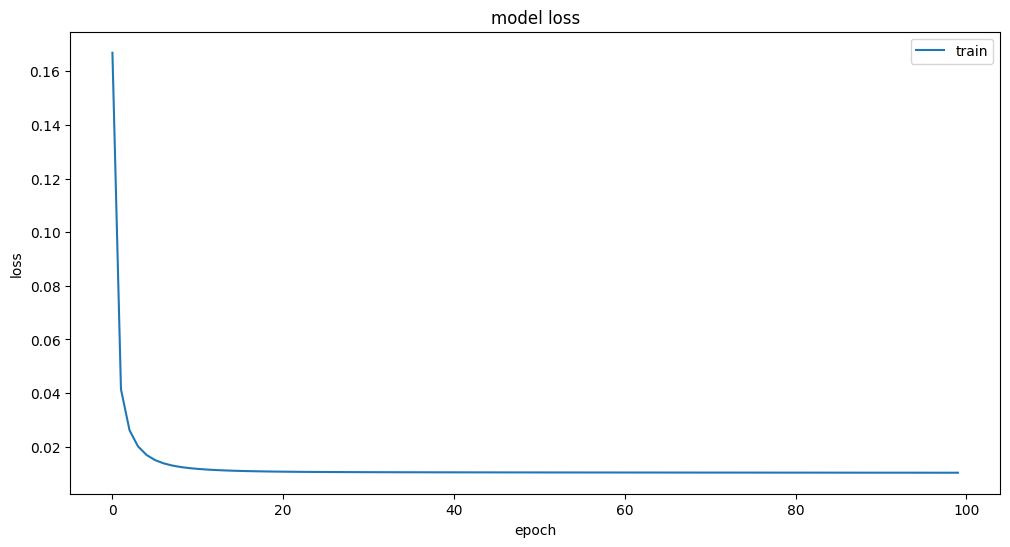

In [ ]:
plt.plot(result.history['loss'])
#plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');
plt.show()

In [ ]:
y_train_pred = model.predict(X_train_norm[:,:])
y_train_pred.shape

21865/21865 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step


(699659, 1)

In [ ]:
error_thresh = 0.8

In [ ]:
y_test_pred = model.predict(X_test_norm)
mae_vector = np.sqrt(np.mean((y_test_pred - X_test_norm) ** 2, axis=1))
anomalies = (mae_vector > error_thresh)

np.count_nonzero(anomalies) / len(anomalies)

9371/9371 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


1.0

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, anomalies))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       498
           1       1.00      1.00      1.00    299356

    accuracy                           1.00    299854
   macro avg       0.50      0.50      0.50    299854
weighted avg       1.00      1.00      1.00    299854



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Viết hàm cho neural network với các feed forward-layers đơn giản
def simpleANN(input_shape):
  x = Sequential()
  x.add(Dense(20, activation='relu', kernel_initializer='random_normal', input_dim=input_shape)) #Hidden layer với 1 nodes linear
  #x.add(Dense(20, activation='relu')) # Thêm 1 hidden layer với 10 nodes
  #x.add(Dense(number_of_label, activation='softmax', kernel_initializer='random_normal')) #Output layer, số nodes bằng với số labels
  x.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal')) #Output layer, số nodes bằng 1 ứng với bài toán phân loại 2 lớp
  return x

In [ ]:
# Train model với data chưa qua PCA
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = simpleANN(input_shp_pca)
#adamopt = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
sgdopt = tf.keras.optimizers.SGD(learning_rate= 0.03 )
model.summary()
model.compile(loss='binary_crossentropy', optimizer=sgdopt, metrics=['accuracy']) #Hàm loss: crossentropy, hàm tối ưu adam
result = model.fit(X_train_norm_reduce, y_train, epochs = 100, batch_size = 1024, callbacks=[callback]) #Train mạng neuron

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 20)                  │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9982 - loss: 0.2764
Epoch 2/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9982 - loss: 0.0234
Epoch 3/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9982 - loss: 0.0147
Epoch 4/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9984 - loss: 0.0121
Epoch 5/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9984 - loss: 0.0114
Epoch 6/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9984 - loss: 0.0107
Epoch 7/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9984 - loss: 0.0108
Epoch 8/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9984 - loss: 0.0104
Epoch 9/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9984 - loss: 0.0102
Epoch 10/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9983 - loss: 0.0107
Epoch 11/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9983 - loss: 0.0107
Epoch 12/100
684/684 ━━━━━━━━━━━━━━━━━━━━

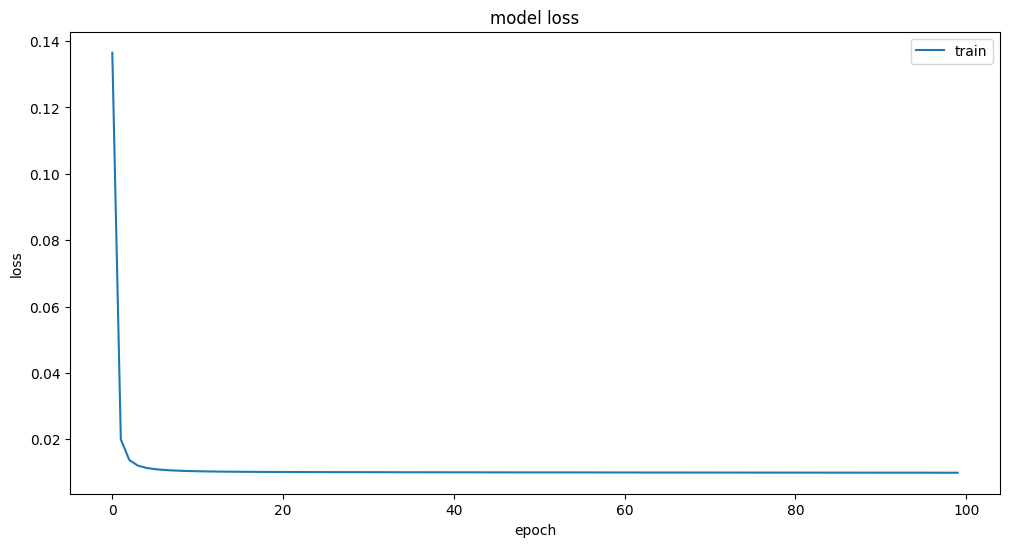

In [ ]:
plt.plot(result.history['loss'])
#plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');
plt.show()

In [ ]:
error_thresh = 0.8

In [ ]:
y_test_pred = model.predict(X_test_norm_reduce)
mae_vector = np.sqrt(np.mean((y_test_pred - X_test_norm_reduce) ** 2, axis=1))
anomalies = (mae_vector > error_thresh)

np.count_nonzero(anomalies) / len(anomalies)

9371/9371 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


0.9998232473136927

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, anomalies))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       498
           1       1.00      1.00      1.00    299356

    accuracy                           1.00    299854
   macro avg       0.50      0.50      0.50    299854
weighted avg       1.00      1.00      1.00    299854

